In [1]:
from jax import config
config.update("jax_enable_x64", True)

import jax.numpy as jnp
from jax.typing import ArrayLike
from diffrax import ODETerm, diffeqsolve, Dopri5, SaveAt
import matplotlib.pyplot as plt

## Logistic growth model

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right)
$$

Reference: https://en.wikipedia.org/wiki/Logistic_function#Logistic_differential_equation

In [2]:
def logistic(t: float, y: ArrayLike, args: tuple[float, float]) -> ArrayLike:
    """Logistic growth model.

    Args:
        t: time
        y: dependent variable
        args: parameters
        
    Returns:
        dydt: derivative of y
    """
    r, K = args
    return r * y * (1 - y / K)

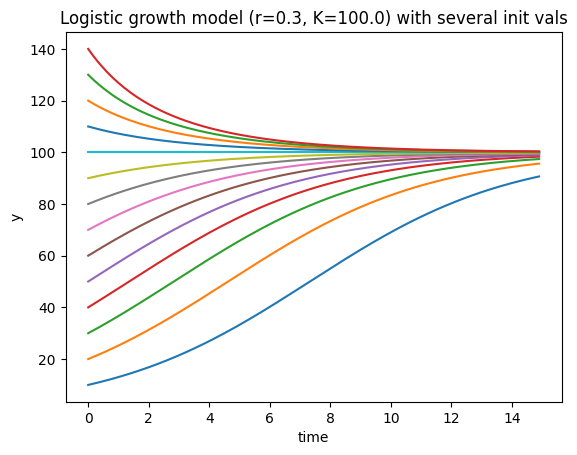

In [3]:
r = 0.3
K = 100.0
args = (r, K)
y0 = jnp.arange(0.1, 1.5, 0.1) * K # initial value
t0, t1, dt = 0, 15, 0.1 # init time, final time, time step
ts = jnp.arange(t0, t1, dt) # time steps
# use diffrax to solve diff eq.
term = ODETerm(logistic)
solver = Dopri5()
saveat = SaveAt(ts=ts)
sol = diffeqsolve(term, solver, t0, t1, dt, y0, args, saveat=saveat)
plt.plot(sol.ts, sol.ys)
plt.title(f'Logistic growth model (r={r}, K={K}) with several init vals')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

### Check with exact solution

$$
N(t) = \frac{K}{1+(K/N_{0}-1)e^{-rt}}
$$

In [4]:
def exact_sol(t: ArrayLike, N0:float, args: tuple[float, float]) -> ArrayLike:
    r, K = args
    return K / (1 + (K/N0-1)*jnp.exp(-r*t))

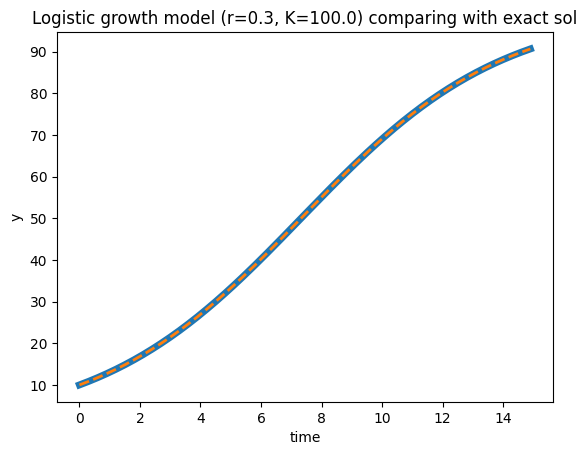

In [5]:
r = 0.3
K = 100.0
args = (r, K)
y0 = jnp.array(0.1 * K) # initial value
t0, t1, dt = 0, 15, 0.1 # init time, final time, time step
ts = jnp.arange(t0, t1, dt) # time steps
# use diffrax to solve diff eq.
term = ODETerm(logistic)
solver = Dopri5()
saveat = SaveAt(ts=ts)
sol = diffeqsolve(term, solver, t0, t1, dt, y0, args, saveat=saveat)
# exact solution
sol_exact = exact_sol(ts, y0, args)

# plot
plt.plot(ts, sol.ys, lw=5, label='Numerical')
plt.plot(ts, sol_exact, lw=2, ls='dashed', label='Exact')
plt.xlabel('time')
plt.ylabel('y')
plt.title(f'Logistic growth model (r={r}, K={K}) comparing with exact sol')
plt.show()